In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import io
import os
from sklearn import tree, preprocessing
from sklearn.model_selection import cross_val_score
from IPython.display import Image  
from sklearn.externals.six import StringIO  
import pydotplus
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

In [15]:
fisheriris_mat = io.loadmat(os.path.join('..','DATA','fisheriris.mat'))
meas = fisheriris_mat['meas']
species = fisheriris_mat['species']
le = preprocessing.LabelEncoder()
le.fit(species.reshape(-1).tolist())
species_label = le.transform(species.reshape(-1).tolist()) 

decision_tree = tree.DecisionTreeClassifier(max_depth=3).fit(meas,species_label)

dot_data = StringIO()

tree.export_graphviz(decision_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

cv = cross_val_score(decision_tree, meas, species_label, cv=10) #cross-validate the model
classError = 1-np.mean(cv) # average error over all cross-validation iterations

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


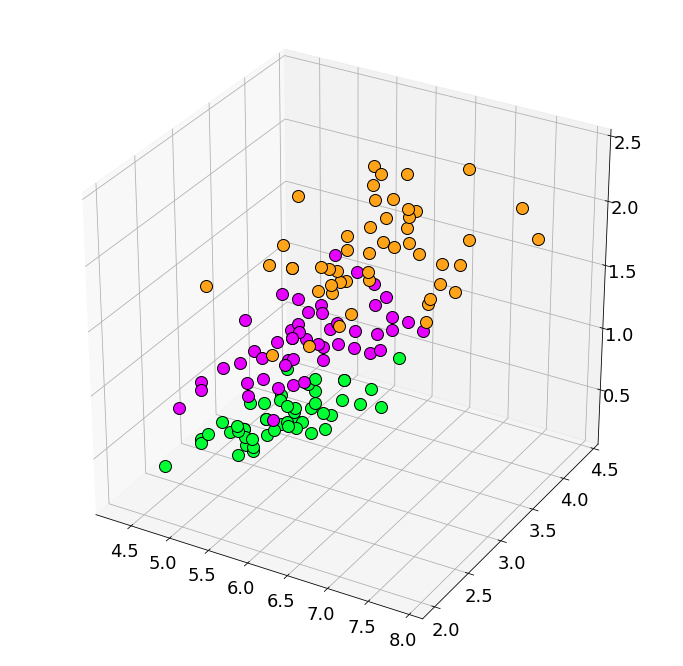

In [20]:
x1 = meas[:50,:]     # setosa
x2 = meas[50:100,:]  # versicolor
x3 = meas[100:150,:] # virginica

fig = plt.figure()
ax = plt.subplot(111,projection='3d')
ax.plot(x1[:,0],x1[:,1],x1[:,3],'o',markerfacecolor=(0,1,0.2),markeredgecolor='k',ms=12)
ax.plot(x2[:,0],x2[:,1],x2[:,3],'o',markerfacecolor=(0.9,0,1),markeredgecolor='k',ms=12)
ax.plot(x3[:,0],x3[:,1],x3[:,3],'o',markerfacecolor=(1,0.64,0.098),markeredgecolor='k',ms=12)

plt.show()

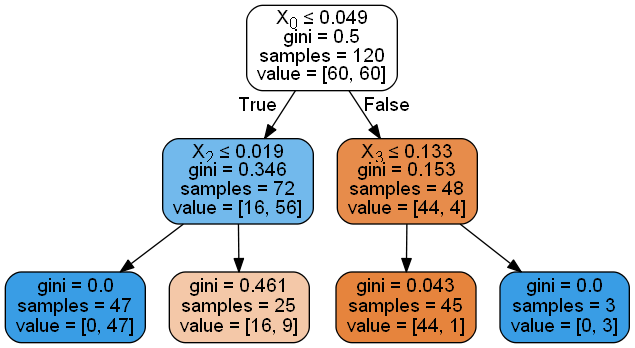

In [23]:
# dogs vs. cats
dogdata_w_mat = io.loadmat(os.path.join('..','DATA','dogData_w.mat'))
catdata_w_mat = io.loadmat(os.path.join('..','DATA','catData_w.mat'))

dog_wave = dogdata_w_mat['dog_wave']
cat_wave = catdata_w_mat['cat_wave']

CD = np.concatenate((dog_wave,cat_wave),axis=1)

u,s,vT = np.linalg.svd(CD-np.mean(CD),full_matrices=0)
v = vT.T

features = np.arange(1,21)
xtrain = np.concatenate((v[:60,features],v[80:140,features]))
test = np.concatenate((v[60:80,features],v[140:160,features]))

label = np.repeat(np.array([1,-1]),60)
truth = np.repeat(np.array([1,-1]),20)

Mdl = tree.DecisionTreeClassifier(max_depth=2).fit(xtrain,label)
cv = cross_val_score(Mdl, xtrain, label, cv=10) #cross-validate the model
classError = 1-np.mean(cv) # average error over all cross-validation iterations

dot_data = StringIO()

tree.export_graphviz(Mdl, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

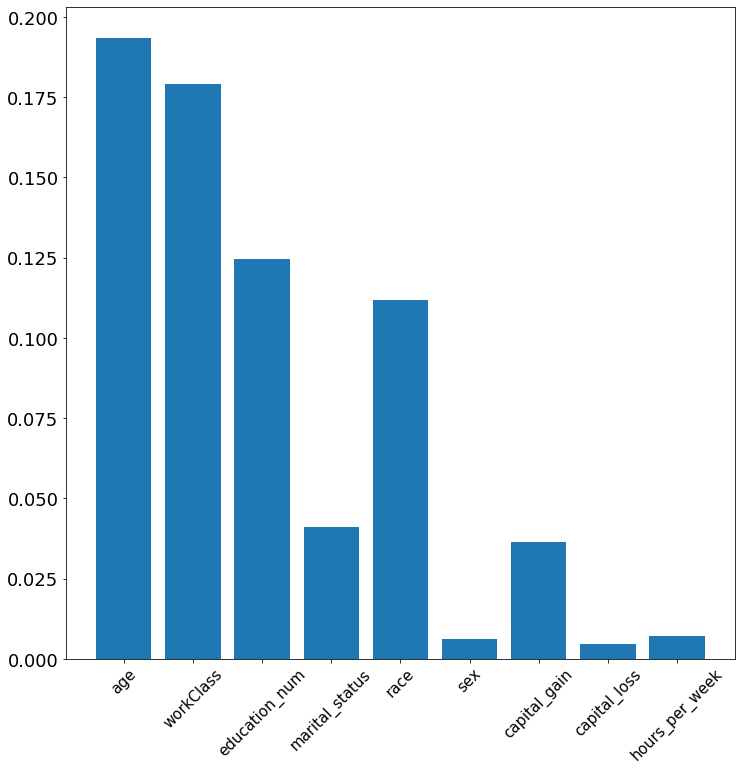

In [92]:
## Census Data
adultdata = pd.read_csv(os.path.join('..','DATA','census1994.csv'))

adultdata = adultdata.loc[:,('age','workClass','education_num','marital_status','race','sex','capital_gain','capital_loss','hours_per_week','salary')]

nFeatures = len(adultdata.columns)-1

# convert categorical variables to one-hot representation
adultdata = pd.get_dummies(adultdata, columns=['workClass', 'marital_status', 'race', 'sex', 'salary'])

adultdata_input = adultdata.drop(['salary_>50K','salary_<=50K'],axis=1)
adultdata_salary = adultdata['salary_>50K']

Mdl = tree.DecisionTreeClassifier(max_features=10).fit(adultdata_input,adultdata_salary)
imp = Mdl.feature_importances_
imp_combine = np.zeros(nFeatures)
imp_combine[:5] = imp[:5]
imp_combine[5] = np.mean(imp[5:14])
imp_combine[6] = np.mean(imp[14:21])
imp_combine[7] = np.mean(imp[21:26])
imp_combine[8] = np.mean(imp[26:28])

plt.bar(range(len(imp_combine)),imp_combine)
infeatures = ['age','workClass','education_num', 'marital_status', 'race', 'sex', 'capital_gain','capital_loss','hours_per_week']
plt.xticks(range(len(infeatures)), infeatures, size='small',rotation=45)
plt.show()

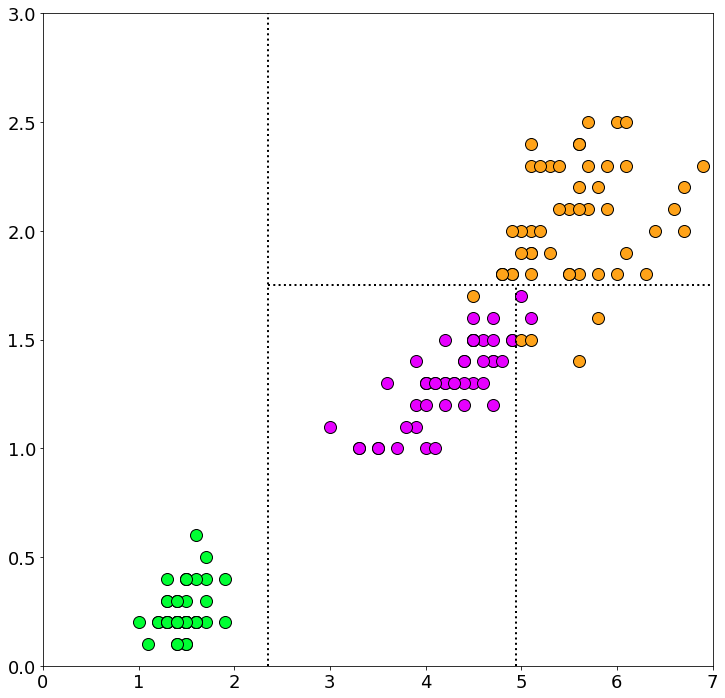

In [97]:
## Splitting Procedure
fisheriris_mat = io.loadmat(os.path.join('..','DATA','fisheriris.mat'))
meas = fisheriris_mat['meas']
species = fisheriris_mat['species']

x1 = meas[:50,:]     # setosa
x2 = meas[50:100,:]  # versicolor
x3 = meas[100:150,:] # virginica

plt.plot(x1[:,2],x1[:,3],'o',markerfacecolor=(0,1,0.2),markeredgecolor='k',ms=12)
plt.plot(x2[:,2],x2[:,3],'o',markerfacecolor=(0.9,0,1),markeredgecolor='k',ms=12)
plt.plot(x3[:,2],x3[:,3],'o',markerfacecolor=(1,0.64,0.098),markeredgecolor='k',ms=12)

plt.plot(np.array([2.35, 2.35]),np.array([0, 3]),'k:',linewidth=2)
plt.plot(np.array([2.35, 10]),np.array([1.75, 1.75]),'k:',linewidth=2)
plt.plot(np.array([4.95, 4.95]),np.array([0, 1.75]),'k:',linewidth=2)

plt.xlim(0,7)
plt.ylim(0,3)

plt.show()

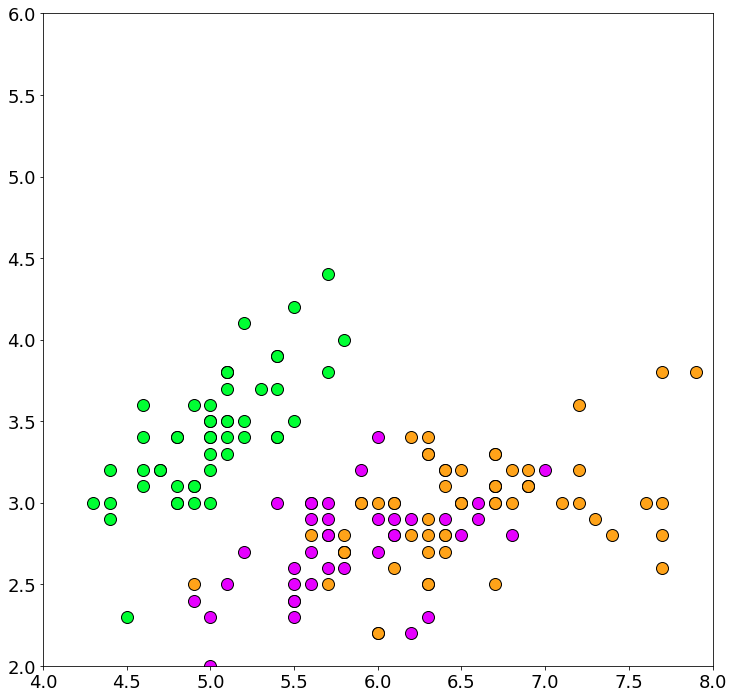

In [98]:
plt.plot(x1[:,0],x1[:,1],'o',markerfacecolor=(0,1,0.2),markeredgecolor='k',ms=12)
plt.plot(x2[:,0],x2[:,1],'o',markerfacecolor=(0.9,0,1),markeredgecolor='k',ms=12)
plt.plot(x3[:,0],x3[:,1],'o',markerfacecolor=(1,0.64,0.098),markeredgecolor='k',ms=12)

plt.xlim(4,8)
plt.ylim(2,6)

plt.show()